In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Project\Beds_Occupied.csv")
data.head()

,collection_date,Total Inpatient Beds
0,15-06-2020,293
1,16-06-2020,295
2,17-06-2020,290
3,18-06-2020,291
4,19-06-2020,288


In [3]:
data.shape

(359, 2)

In [4]:
data.describe()

,Total Inpatient Beds
count,359.000000
mean,241.983287
std,28.936836
min,190.000000
25%,219.000000
50%,235.000000
75%,259.000000
max,341.000000


## EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collection_date       359 non-null    object
 1   Total Inpatient Beds  359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [6]:
data.isnull().sum()

collection_date         0
Total Inpatient Beds    0
dtype: int64

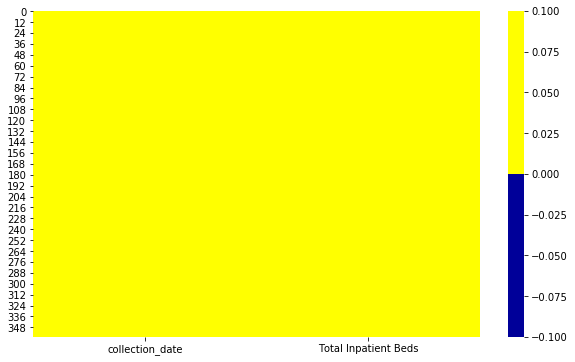

In [7]:
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

## There is no any null value present is data

## We will convert collection_date column to datetime format

In [8]:
data['collection_date'] =  pd.to_datetime(data['collection_date'],infer_datetime_format=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   collection_date       359 non-null    datetime64[ns]
 1   Total Inpatient Beds  359 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.7 KB


## From Dtype we can see that collection_date column is converted to datetime format.

## Since our objective is to forecast the data available and find out estimated beds available for the period of next one month. we will create one more column of Total available beds.

In [10]:
data['Total_available_beds'] = 900 - data['Total Inpatient Beds']
data.head()

,collection_date,Total Inpatient Beds,Total_available_beds
0,2020-06-15,293,607
1,2020-06-16,295,605
2,2020-06-17,290,610
3,2020-06-18,291,609
4,2020-06-19,288,612


In [11]:
data1 = data.drop(['Total Inpatient Beds'],axis=1)
data1.head()

,collection_date,Total_available_beds
0,2020-06-15,607
1,2020-06-16,605
2,2020-06-17,610
3,2020-06-18,609
4,2020-06-19,612


In [12]:
data1['collection_date'].duplicated().any()

False

## No any Duplicates present in Collection Date column

In [13]:
indexedDataset = data1.set_index(['collection_date'])

In [14]:
indexedDataset.describe()

,Total_available_beds
count,359.000000
mean,658.016713
std,28.936836
min,559.000000
25%,641.000000
50%,665.000000
75%,681.000000
max,710.000000


In [15]:
missing_dates=pd.date_range(start="2020-06-15", end="2021-06-15").difference(indexedDataset.index)
missing_dates

DatetimeIndex(['2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29',
               '2021-05-14', '2021-05-15', '2021-05-16'],
              dtype='datetime64[ns]', freq=None)

## There are 7 missing dates in our collection date column.we need to add them.

In [16]:
r = pd.date_range(start="2020-06-15", end="2021-06-15")
newdata=indexedDataset.reindex(r).rename_axis('collection_date').reset_index()
newdata.head()

,collection_date,Total_available_beds
0,2020-06-15,607.0
1,2020-06-16,605.0
2,2020-06-17,610.0
3,2020-06-18,609.0
4,2020-06-19,612.0


In [17]:
newdata.shape

(366, 2)

In [18]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   collection_date       366 non-null    datetime64[ns]
 1   Total_available_beds  359 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [19]:
newdata[newdata['Total_available_beds'].isnull()]

,collection_date,Total_available_beds
164,2020-11-26,NaN
165,2020-11-27,NaN
166,2020-11-28,NaN
167,2020-11-29,NaN
333,2021-05-14,NaN
334,2021-05-15,NaN
335,2021-05-16,NaN


## We can see that missing dates are added. so we have 366 non null values in collection date column.

## We will use Interpolation technique to fill NA values for newly added missing dates.

In [20]:
finaldata= newdata.interpolate(method='linear')

In [21]:
finaldata.head()

,collection_date,Total_available_beds
0,2020-06-15,607.0
1,2020-06-16,605.0
2,2020-06-17,610.0
3,2020-06-18,609.0
4,2020-06-19,612.0


In [22]:
finaldata.iloc[164]

collection_date         2020-11-26 00:00:00
Total_available_beds                  688.2
Name: 164, dtype: object

## Outlier Detection

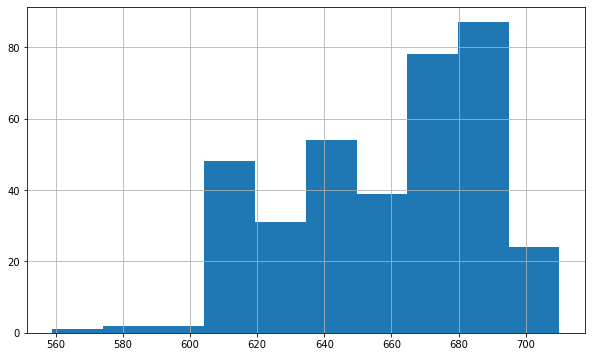

In [23]:
finaldata['Total_available_beds'].hist()

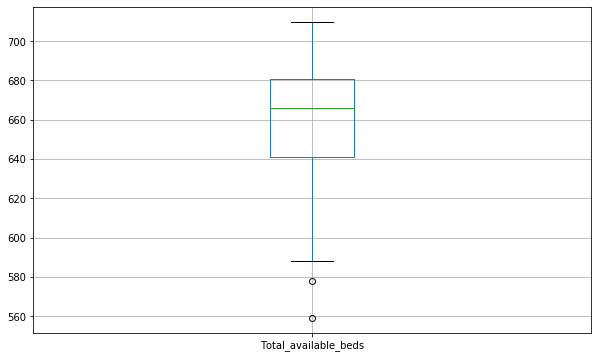

In [24]:
finaldata.boxplot(column='Total_available_beds')

## There are two outliers present 560 and 580. and they are at the lower side. so we can keep them as it is.

## Line plot

Text(0, 0.5, 'Available Beds')

<Figure size 1080x576 with 0 Axes>

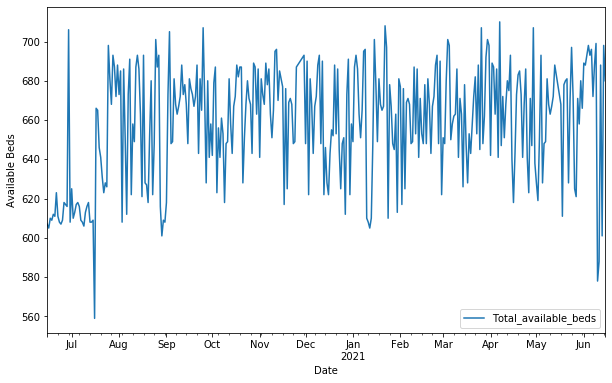

In [25]:
plt.figure(figsize=(15,8))
finaldata.plot(x = 'collection_date', y = 'Total_available_beds')
plt.xlabel('Date')
plt.ylabel('Available Beds')

## We will check if our data is stationary or having some trend or seasonality

In [26]:
rolmean = finaldata.rolling(window=8).mean() 
rolstd = finaldata.rolling(window=8).std()
print(rolmean,rolstd)

     Total_available_beds
0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
..                    ...
361                664.00
362                662.75
363                651.25
364                651.50
365                652.50

[366 rows x 1 columns]      Total_available_beds
0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
..                    ...
361             50.790888
362             49.950690
363             52.515984
364             52.763624
365             53.280927

[366 rows x 1 columns]


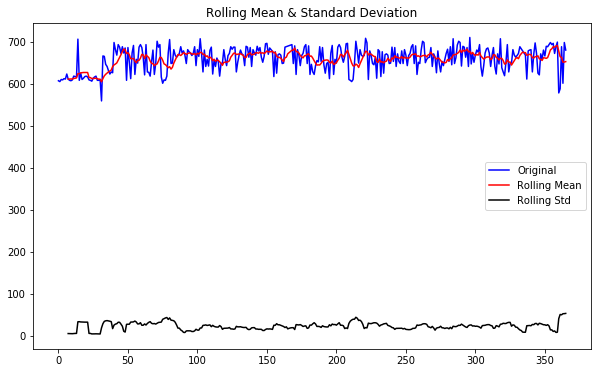

In [27]:
orig = plt.plot(finaldata['Total_available_beds'], color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## From above graph we can see that rolling mean and rolling std are constant over a time. so we can say that there is no any trend or seasonality present.

## Augmented Dickey–Fuller test:

In [28]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(finaldata['Total_available_beds'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -5.806344e+00
p-value                        4.507242e-07
#Lags Used                     4.000000e+00
Number of Observations Used    3.610000e+02
Critical Value (1%)           -3.448595e+00
Critical Value (5%)           -2.869580e+00
Critical Value (10%)          -2.571053e+00
dtype: float64


For a Time series to be stationary, its ADCF test should have:

1.p-value to be low (according to the null hypothesis)

2.The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics.

## From the above ADCF test result, we see that p-value is very low. Also critical values are close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is stationary.

## Time Series Decomposition plot

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

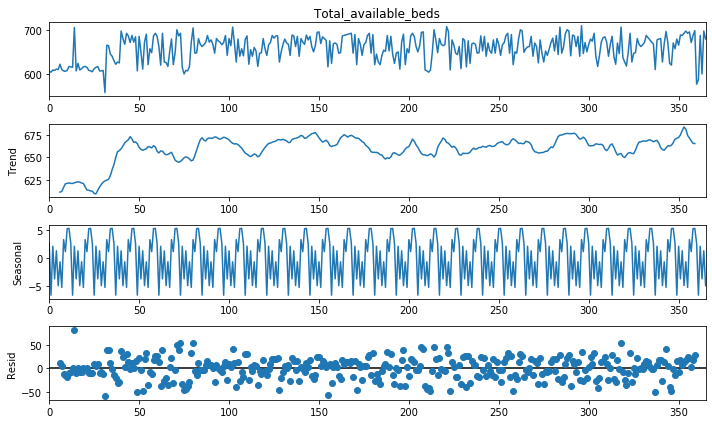

In [30]:
decompose_ts_add = seasonal_decompose(finaldata['Total_available_beds'],period=12)
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

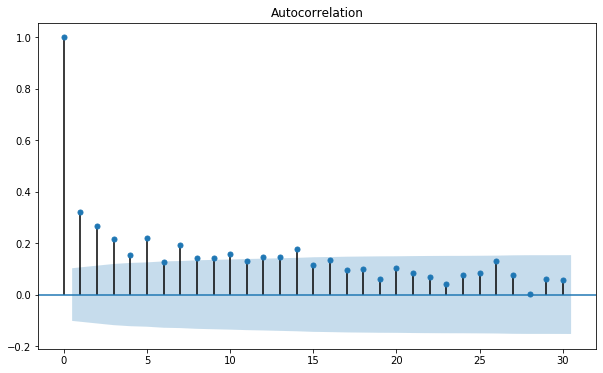

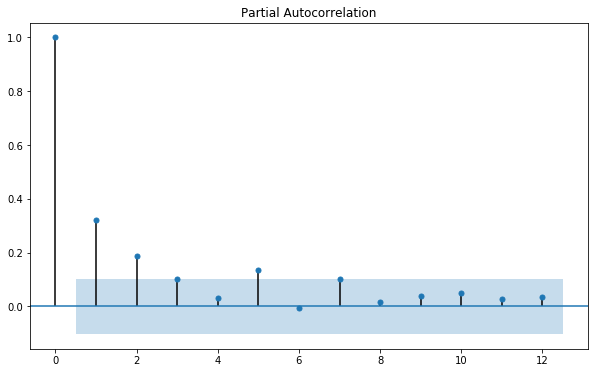

In [31]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(finaldata['Total_available_beds'],lags=30)
tsa_plots.plot_pacf(finaldata['Total_available_beds'],lags=12)
plt.show()


## Model Building

In [32]:
finaldata['t'] = range(1,367)
finaldata['tsqr'] = finaldata['t']**2
finaldata['log_Total_available_beds'] = np.log(finaldata['Total_available_beds'])
finaldata.head()

,collection_date,Total_available_beds,t,tsqr,log_Total_available_beds
0,2020-06-15,607.0,1,1,6.408529
1,2020-06-16,605.0,2,4,6.405228
2,2020-06-17,610.0,3,9,6.413459
3,2020-06-18,609.0,4,16,6.411818
4,2020-06-19,612.0,5,25,6.416732


In [33]:
#finaldata["month"] = finaldata.collection_date.dt.strftime("%b")
finaldata["day"] = finaldata.collection_date.dt.strftime("%A")

In [34]:
finaldata.head()

,collection_date,Total_available_beds,t,tsqr,log_Total_available_beds,day
0,2020-06-15,607.0,1,1,6.408529,Monday
1,2020-06-16,605.0,2,4,6.405228,Tuesday
2,2020-06-17,610.0,3,9,6.413459,Wednesday
3,2020-06-18,609.0,4,16,6.411818,Thursday
4,2020-06-19,612.0,5,25,6.416732,Friday


In [35]:
finaldata = pd.get_dummies(finaldata)

In [36]:
finaldata.head()

,collection_date,Total_available_beds,t,tsqr,log_Total_available_beds,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2020-06-15,607.0,1,1,6.408529,0,1,0,0,0,0,0
1,2020-06-16,605.0,2,4,6.405228,0,0,0,0,0,1,0
2,2020-06-17,610.0,3,9,6.413459,0,0,0,0,0,0,1
3,2020-06-18,609.0,4,16,6.411818,0,0,0,0,1,0,0
4,2020-06-19,612.0,5,25,6.416732,1,0,0,0,0,0,0


## Spliting data into train and test

In [37]:
train = finaldata.iloc[0:330,:]
test = finaldata.iloc[330:,:]

In [38]:
test.shape

(36, 12)

In [39]:
train.shape

(330, 12)

## RMSE function

In [40]:
def RMSE(org,pred):
    return np.sqrt(np.mean((np.array(org)-np.array(pred))**2))

## Linear Model

In [41]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Total_available_beds~t',data=train).fit()
pred_linear_test =  pd.Series(linear_model.predict(test['t']))

In [42]:
rmse_linear_test = RMSE(test['Total_available_beds'],pred_linear_test)
rmse_linear_test

32.55698213771311

In [43]:
pred_linear_train =  pd.Series(linear_model.predict(train['t']))
rmse_linear_train = RMSE(train['Total_available_beds'],pred_linear_train)
rmse_linear_train

27.20789769918551

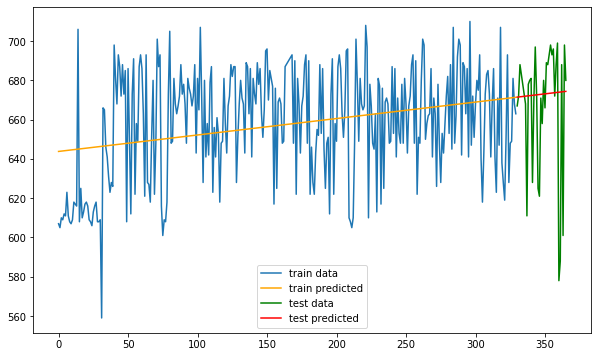

In [44]:
plt.plot(train['Total_available_beds'],color='C0',label='train data')
plt.plot(pred_linear_train,color='orange',label='train predicted')
plt.plot(test['Total_available_beds'],color='green',label='test data')
plt.plot(pred_linear_test,color='red',label='test predicted')
plt.legend(loc='best')

## Exponential Model

In [45]:
Exp = smf.ols('log_Total_available_beds~t',data=train).fit()
pred_Exp_test = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
pred_test = np.exp(pred_Exp_test)

In [46]:
rmse_exp_test=RMSE(test['Total_available_beds'],pred_test)
rmse_exp_test

32.56516119858714

In [47]:
pred_Exp_train = pd.Series(Exp.predict(pd.DataFrame(train['t'])))
pred_train = np.exp(pred_Exp_train)
rmse_exp_train =RMSE(train['Total_available_beds'],pred_train)
rmse_exp_train

27.229102878131933

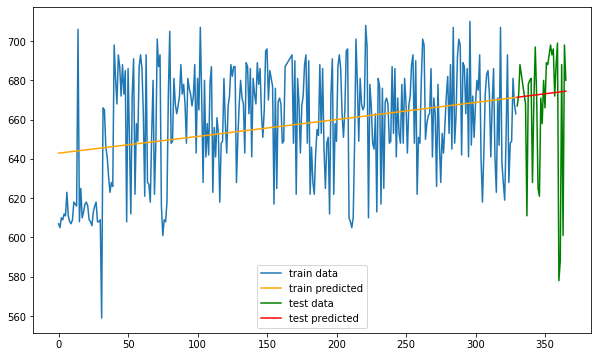

In [48]:
plt.plot(train['Total_available_beds'],color='C0',label='train data')
plt.plot(pred_train,color='orange',label='train predicted')
plt.plot(test['Total_available_beds'],color='green',label='test data')
plt.plot(pred_test,color='red',label='test predicted')
plt.legend(loc='best')

## Quadratic Model

In [49]:
Quad = smf.ols('Total_available_beds~t+tsqr',data=train).fit()
pred_Quad_test = pd.Series(Quad.predict(test[["t","tsqr"]]))

In [50]:
rmse_quad_test=RMSE(test['Total_available_beds'],pred_Quad_test)
rmse_quad_test

37.48636404100624

In [51]:
pred_Quad_train = pd.Series(Quad.predict(train[["t","tsqr"]]))
rmse_quad_train=RMSE(train['Total_available_beds'],pred_Quad_train)
rmse_quad_train

25.859032791657796

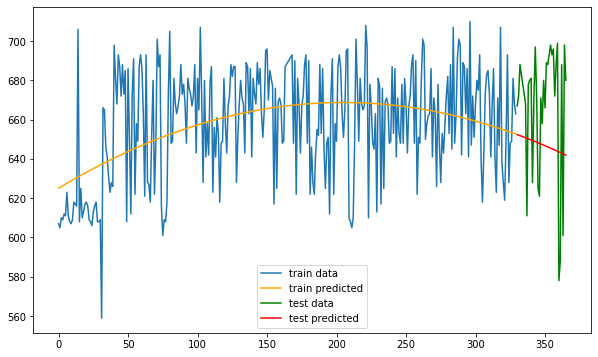

In [52]:
plt.plot(train['Total_available_beds'],color='C0',label='train data')
plt.plot(pred_Quad_train,color='orange',label='train predicted')
plt.plot(test['Total_available_beds'],color='green',label='test data')
plt.plot(pred_Quad_test,color='red',label='test predicted')
plt.legend(loc='best')

## Additive seasonality Model

In [53]:
add_sea = smf.ols('Total_available_beds~day_Monday+day_Tuesday+day_Wednesday+day_Thursday+day_Friday+day_Saturday',data=train).fit()
pred_add_sea_test = pd.Series(add_sea.predict(test[['day_Monday','day_Tuesday','day_Wednesday','day_Thursday','day_Friday','day_Saturday']]))

In [54]:
rmse_add_sea_test=RMSE(test['Total_available_beds'],pred_add_sea_test)
rmse_add_sea_test

33.21590861157919

In [55]:
pred_add_sea_train = pd.Series(add_sea.predict(train[['day_Monday','day_Tuesday','day_Wednesday','day_Thursday','day_Friday','day_Saturday']]))
rmse_add_sea_train=RMSE(train['Total_available_beds'],pred_add_sea_train)
rmse_add_sea_train

27.85651372227114

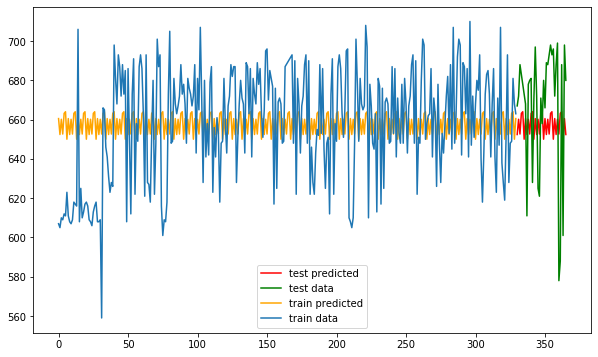

In [56]:
plt.plot(pred_add_sea_test,color='red',label='test predicted')
plt.plot(test['Total_available_beds'],color='green',label='test data')
plt.plot(pred_add_sea_train,color='orange',label='train predicted')
plt.plot(train['Total_available_beds'],color='C0',label='train data')
plt.legend(loc='best')

## Additive Seasonality Quadratic Model

In [57]:
add_sea_Quad = smf.ols('Total_available_beds~t+tsqr+day_Monday+day_Tuesday+day_Wednesday+day_Thursday+day_Friday+day_Saturday',data=train).fit()
pred_add_sea_quad_test = pd.Series(add_sea_Quad.predict(test[['day_Monday','day_Tuesday','day_Wednesday','day_Thursday','day_Friday','day_Saturday','t','tsqr']]))

In [58]:
rmse_add_sea_quad_test=RMSE(test['Total_available_beds'],pred_add_sea_quad_test)
rmse_add_sea_quad_test

37.43808834728812

In [59]:
pred_add_sea_quad_train = pd.Series(add_sea_Quad.predict(train[['day_Monday','day_Tuesday','day_Wednesday','day_Thursday','day_Friday','day_Saturday','t','tsqr']]))
rmse_add_sea_quad_train=RMSE(train['Total_available_beds'],pred_add_sea_quad_train)
rmse_add_sea_quad_train

25.30688236825612

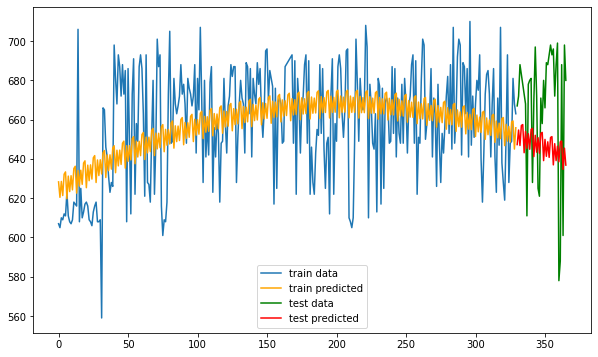

In [60]:
plt.plot(train['Total_available_beds'],color='C0',label='train data')
plt.plot(pred_add_sea_quad_train,color='orange',label='train predicted')
plt.plot(test['Total_available_beds'],color='green',label='test data')
plt.plot(pred_add_sea_quad_test,color='red',label='test predicted')
plt.legend(loc='best')

## Simple Exponential Method

In [61]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(train["Total_available_beds"]).fit(smoothing_level=0.2)
pred_ses_test = ses_model.predict(start = test.index[0],end = test.index[-1])

In [62]:
rmse_ses_test=RMSE(test['Total_available_beds'],pred_ses_test)
rmse_ses_test

32.8400914421935

In [63]:
pred_ses_train = ses_model.predict(start = train.index[0],end = train.index[-1])
rmse_ses_train=RMSE(train['Total_available_beds'],pred_ses_train)
rmse_ses_train

25.69816539565449

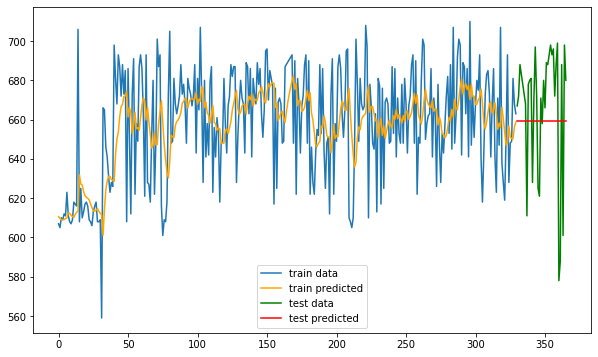

In [64]:
plt.plot(train['Total_available_beds'],color='C0',label='train data')
plt.plot(pred_ses_train,color='orange',label='train predicted')
plt.plot(test['Total_available_beds'],color='green',label='test data')
plt.plot(pred_ses_test,color='red',label='test predicted')
plt.legend(loc='best')

## Holts winter exponential smoothing with additive seasonality

In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_model_add_sea = ExponentialSmoothing(train["Total_available_beds"],seasonal='add',seasonal_periods=8).fit() #add the trend to the model
pred_hwe_add_sea_test = hwe_model_add_sea.predict(start = test.index[0],end = test.index[-1])


In [66]:
rmse_hwe_test=RMSE(test['Total_available_beds'],pred_hwe_add_sea_test)
rmse_hwe_test

32.86570915042065

In [67]:
pred_hwe_add_sea_train = hwe_model_add_sea.predict(start = train.index[0],end = train.index[-1])
rmse_hwe_train=RMSE(train['Total_available_beds'],pred_hwe_add_sea_train)
rmse_hwe_train

25.147581388521047

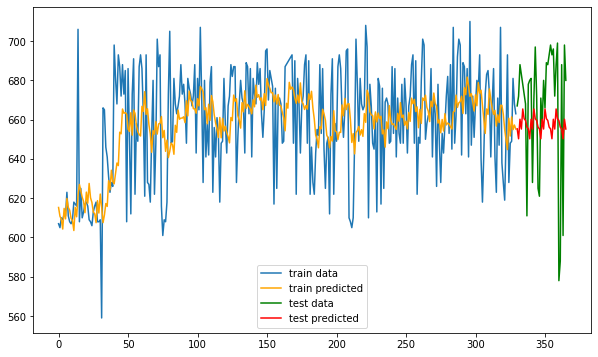

In [68]:
plt.plot(train['Total_available_beds'],color='C0',label='train data')
plt.plot(pred_hwe_add_sea_train,color='orange',label='train predicted')
plt.plot(test['Total_available_beds'],color='green',label='test data')
plt.plot(pred_hwe_add_sea_test,color='red',label='test predicted')
plt.legend(loc='best')

## ARIMA Model

## Plotting ACF & PACF 

C:\Users\VIRAJ KAMAT\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


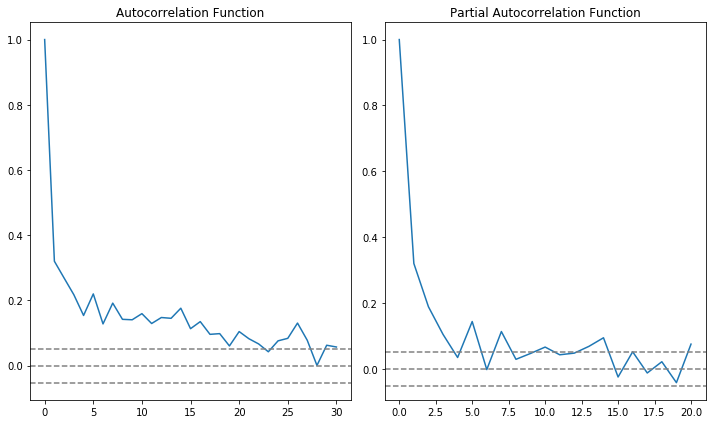

In [69]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(finaldata['Total_available_beds'], nlags=30)
lag_pacf = pacf(finaldata['Total_available_beds'], nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1/np.sqrt(len(finaldata)), linestyle='--', color='gray')
plt.axhline(y=1/np.sqrt(len(finaldata)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1/np.sqrt(len(finaldata)), linestyle='--', color='gray')
plt.axhline(y=1/np.sqrt(len(finaldata)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()  

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
X = train.iloc[:,1].values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train1, test1 = X[0:train_size], X[train_size:]

In [71]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train1, test1 = X[0:train_size], X[train_size:]
    history = [x for x in train1]
# make predictions
    predictions = list()
    for t in range(len(test1)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test1[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test1, predictions))
    return rmse

In [72]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, p_values, d_values, q_values):
    train = train.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train1, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [73]:
p_values = range(0, 6)
d_values = range(0,6)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(train.iloc[:,1], p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=27.384
ARIMA(0, 0, 1) RMSE=25.115
ARIMA(0, 0, 2) RMSE=23.793
ARIMA(0, 0, 3) RMSE=23.613
ARIMA(0, 0, 4) RMSE=23.496
ARIMA(0, 0, 5) RMSE=22.539
ARIMA(0, 1, 0) RMSE=26.572
ARIMA(0, 1, 1) RMSE=20.311
ARIMA(0, 1, 2) RMSE=20.836
ARIMA(0, 1, 3) RMSE=20.901
ARIMA(0, 1, 4) RMSE=21.133
ARIMA(0, 1, 5) RMSE=21.292
ARIMA(0, 2, 0) RMSE=46.662
ARIMA(0, 2, 1) RMSE=26.797
ARIMA(0, 2, 2) RMSE=20.579
ARIMA(0, 2, 3) RMSE=20.878
ARIMA(0, 2, 4) RMSE=21.417
ARIMA(0, 2, 5) RMSE=21.244
ARIMA(1, 0, 0) RMSE=23.481
ARIMA(1, 0, 1) RMSE=20.782
ARIMA(1, 1, 0) RMSE=23.161
ARIMA(1, 1, 1) RMSE=20.680
ARIMA(1, 2, 0) RMSE=33.891
ARIMA(2, 0, 0) RMSE=22.314
ARIMA(2, 0, 2) RMSE=20.335
ARIMA(2, 1, 0) RMSE=22.415
ARIMA(2, 1, 1) RMSE=21.165
ARIMA(2, 2, 0) RMSE=30.537
ARIMA(3, 0, 0) RMSE=21.960
ARIMA(3, 0, 1) RMSE=21.590
ARIMA(3, 1, 0) RMSE=21.749
ARIMA(3, 1, 1) RMSE=21.100
ARIMA(3, 2, 0) RMSE=29.020
ARIMA(3, 2, 1) RMSE=22.015
ARIMA(4, 0, 0) RMSE=21.775
ARIMA(4, 0, 1) RMSE=22.178
ARIMA(4, 1, 0) RMSE=20.906
A

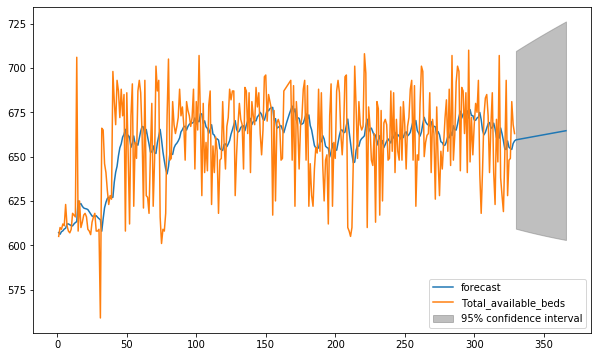

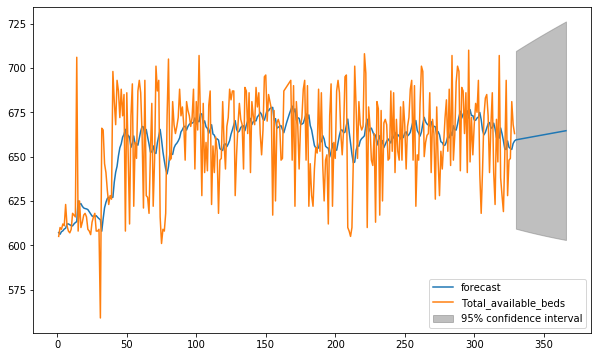

In [73]:
from statsmodels.tsa.arima_model import ARIMA
Arima_model = ARIMA(train['Total_available_beds'], order=(0,1,1)).fit(disp=0)
forecast = Arima_model.forecast(steps=36)[0]
Arima_model.plot_predict(1, 366)

In [74]:
forecast_test = pd.Series(index=range(330,366),data=forecast)

In [75]:
arima_test = RMSE(test['Total_available_beds'], forecast)
arima_test

32.514072796976585

In [76]:
predictions_train = pd.Series(Arima_model.fittedvalues)
#predictions_train_cumsum = predictions_train.cumsum()
arima_train_predicted = train['Total_available_beds'].add(predictions_train,fill_value=0)
arima_train_predicted

0      607.000000
1      605.142792
2      611.205606
3      606.646735
4      611.146516
          ...    
325    675.289908
326    655.563272
327    686.042563
328    644.400422
329    653.807369
Length: 330, dtype: float64

In [77]:
arima_train = RMSE(train['Total_available_beds'],arima_train_predicted)
arima_train

22.4742041658949

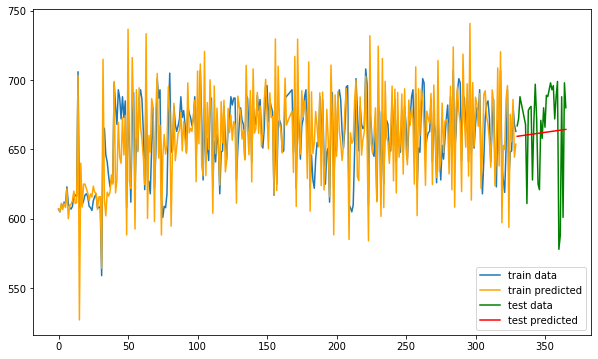

In [78]:
plt.plot(train['Total_available_beds'],color='C0',label='train data')
plt.plot(arima_train_predicted,color='orange',label='train predicted')
plt.plot(test['Total_available_beds'],color='green',label='test data')
plt.plot(forecast_test,color='red',label='test predicted')
plt.legend(loc='best')

## SARIMA Model

In [79]:
import itertools
q = range(0, 4)
d = range(0,2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 2)
SARIMAX: (0, 0, 1) x (0, 0, 2, 2)
SARIMAX: (0, 0, 2) x (0, 0, 3, 2)
SARIMAX: (0, 0, 2) x (0, 1, 0, 2)


In [81]:
import warnings
warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['Total_available_beds'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [82]:
# Output of this will give us the directly sorted dataframe.(Sorted from smallest to largest)
result_sarima_table = pd.DataFrame(SARIMAX_model)
result_sarima_table.columns = ["param","param_seasonal"]
result_sarima_table["AIC"] = AIC
result_sarima_table = result_sarima_table.sort_values(by="AIC",ascending=True).reset_index(drop=True)
result_sarima_table

,param,param_seasonal,AIC
0,"(1, 1, 1)","(1, 1, 3, 2)",2995.491359
1,"(0, 1, 1)","(0, 1, 3, 2)",2996.225739
2,"(3, 0, 1)","(0, 1, 3, 2)",2996.374378
3,"(0, 1, 1)","(1, 1, 3, 2)",2996.618944
4,"(1, 1, 1)","(0, 1, 3, 2)",2996.790783
...,...,...,...
395,"(0, 0, 1)","(3, 0, 3, 2)",4660.395359
396,"(0, 0, 1)","(2, 0, 3, 2)",4666.129008
397,"(0, 0, 0)","(0, 0, 1, 2)",4745.677559
398,"(0, 0, 1)","(0, 0, 0, 2)",4770.733443


In [80]:
sarima_model = sm.tsa.statespace.SARIMAX(train["Total_available_beds"],order = (1,1,1),seasonal_order = (3,0,1,8)).fit(disp=-1) # disp = -1 helps to neglect the errors.


In [81]:
sarima_test_pred = sarima_model.predict(start = test.index[0],end = test.index[-1])

In [82]:
sarima_test_rmse = RMSE(test['Total_available_beds'],sarima_test_pred)
sarima_test_rmse

33.10696562836708

In [83]:
sarima_pred_train = sarima_model.predict(start = train.index[0],end = train.index[-1])

In [84]:
sarima_train_rmse = RMSE(train['Total_available_beds'],sarima_pred_train)
sarima_train_rmse

41.965114737981274

## Model Evaluation

## compairing the results

In [85]:
data = {"MODEL":pd.Series(["Linear","exponential","quadratic","additive_seasonality","additive_seasonality_quadratic","simple_exponential","holt_winter_exp_add_seasonality","ARIMA","SARIMA"]),"RMSE_Test":pd.Series([rmse_linear_test,rmse_exp_test,rmse_quad_test,rmse_add_sea_test,rmse_add_sea_quad_test,rmse_ses_test,rmse_hwe_test,arima_test,sarima_test_rmse]),"RMSE_Train":pd.Series([rmse_linear_train,rmse_exp_train,rmse_quad_train,rmse_add_sea_train,rmse_add_sea_quad_train,rmse_ses_train,rmse_hwe_train,arima_train,sarima_train_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Test'])

,MODEL,RMSE_Test,RMSE_Train
7,ARIMA,32.514073,22.474204
0,Linear,32.556982,27.207898
1,exponential,32.565161,27.229103
5,simple_exponential,32.840091,25.698165
6,holt_winter_exp_add_seasonality,32.865709,25.147581
8,SARIMA,33.106966,41.965115
3,additive_seasonality,33.215909,27.856514
4,additive_seasonality_quadratic,37.438088,25.306882
2,quadratic,37.486364,25.859033


## From above table we can see that Holt Winter Exponential  model is giving good rmse for both train and test

## We will select Holt Winter Exponentioal model for forecasting

In [86]:
final_model = ExponentialSmoothing(finaldata["Total_available_beds"],seasonal='add',seasonal_periods=8).fit()

In [87]:
forecast_final = final_model.forecast(steps=31)


In [88]:
date = pd.date_range(start="2021-06-16", end="2021-07-16")
forecast_beds = pd.DataFrame({'date':date,'available_beds':forecast_final})
forecast_beds['date']=forecast_beds['date'].astype(str)
forecast_beds['available_beds']=forecast_beds['available_beds'].astype(int)

In [89]:
forecast_beds

,date,available_beds
366,2021-06-16,671
367,2021-06-17,668
368,2021-06-18,663
369,2021-06-19,658
370,2021-06-20,661
371,2021-06-21,656
372,2021-06-22,667
373,2021-06-23,661
374,2021-06-24,671
375,2021-06-25,668


In [91]:
model_pred = final_model.predict(start = finaldata.index[0],end = finaldata.index[-1])

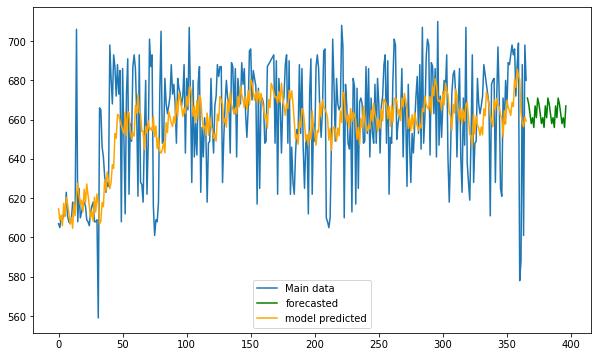

In [92]:
plt.plot(finaldata['Total_available_beds'],color='C0',label='Main data')
plt.plot(forecast_beds['available_beds'],color='green',label='forecasted')
plt.plot(model_pred,color='orange',label='model predicted')

plt.legend(loc='best')